# Regression and Other Stories: Elections Economy
Linear regression with multiple predictors. See Chapters 10, 11 and 12 in Regression and Other Stories.

In [30]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import pymc3 as pm

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import seaborn as sns

In [2]:
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


### A single binary predictor

In [ ]:
import patsy 

y, X = patsy.dmatrices("kid_score ~ mom_hs", data={"kid_score": kidiq["kid_score"], "mom_hs": kidiq["mom_hs"],})
print(dir(X.design_info))
pd.DataFrame(X).rename(dict(zip([0, 1], X.design_info.term_names)), axis=1).head()

In [3]:
model = Model(kidiq)
M1 = model.fit('kid_score ~ mom_hs', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.8814450250576288, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [76]:
func_dict = {"Median": np.median,
            "MAD_SD": stats.median_abs_deviation,
             }
coefs = az.summary(M1, stat_funcs=func_dict, extend=False, round_to=2)
coefs1 = coefs.copy()

coefs

,Median,MAD_SD
Intercept[0],77.60,1.46
mom_hs[0],11.74,1.63
kid_score_sd,19.68,0.36


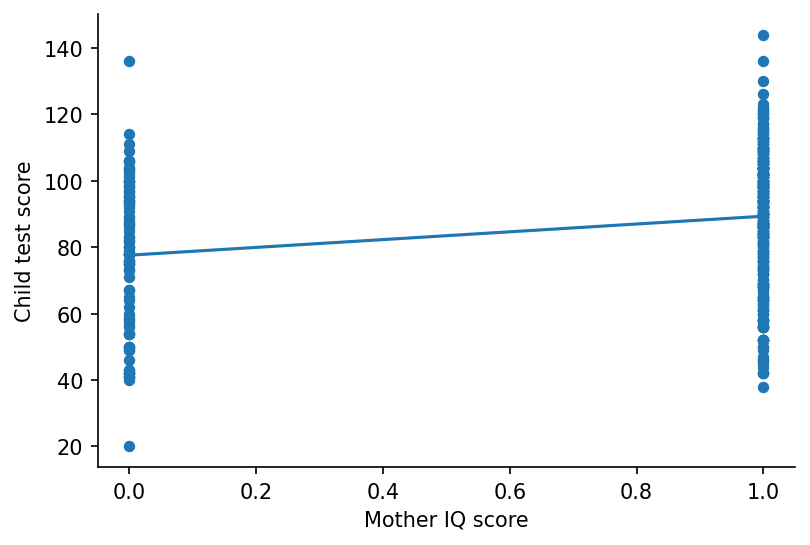

In [37]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mom_hs[0]", "Median"]

# Generate x range
iq_domain = np.linspace(kidiq["mom_hs"].min(), kidiq["mom_hs"].max(), 100)

# Plot Line
ax.plot(iq_domain, a_hat + b_hat * iq_domain)

# Add scatter plot
kidiq.plot(kind="scatter", x="mom_hs", y="kid_score", ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");
sns.despine()

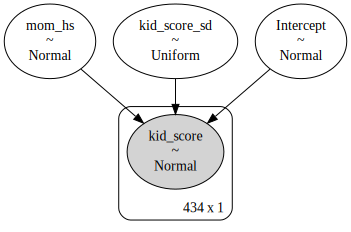

In [5]:
pm_model = model.backend.model
pm.model_to_graphviz(pm_model)

### A single continuous predictor

In [26]:
model = Model(kidiq)
fit_2 = model.fit('kid_score ~ mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_iq, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_iq, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.895911857036871, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.88634652717056, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8955352001181108, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future re

['Intercept', 'RV_dims', 'Var', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__latex__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_context_class', '_old_theano_config', '_parent', '_repr_latex_', '_theano_config', 'add_coords', 'add_random_variable', 'basic_RVs', 'bijection', 'check_test_point', 'cont_vars', 'contexts', 'coords', 'd2logp', 'd2logp_nojac', 'datalogpt', 'deterministics', 'dict_to_array', 'disc_vars', 'dlogp', 'dlogp_array', 'dlogp_nojac', 'fastd2logp', 'fastd2logp_nojac', 'fastdlogp', 'fastdlogp_nojac', 'fastfn', 'fastlogp', 'fastlogp_nojac', 'flatten', 'fn', 'free_RVs', 'isroot', 'kid_score', 'kid_score_sd', 'kid_score_sd_interval__',

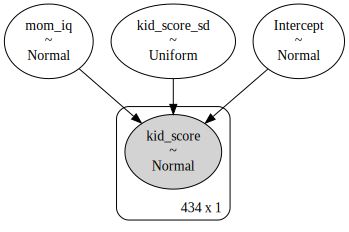

In [27]:
pm_model = model.backend.model
print(dir(pm_model))
pm.model_to_graphviz(pm_model)

In [75]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_2, stat_funcs=func_dict, extend=False, round_to=2)
coefs2 = coefs.copy()
coefs

,Median,MAD_SD
Intercept[0],26.00,3.87
mom_iq[0],0.61,0.04
kid_score_sd,18.30,0.42


### Displaying a regression line as a function of one input variable

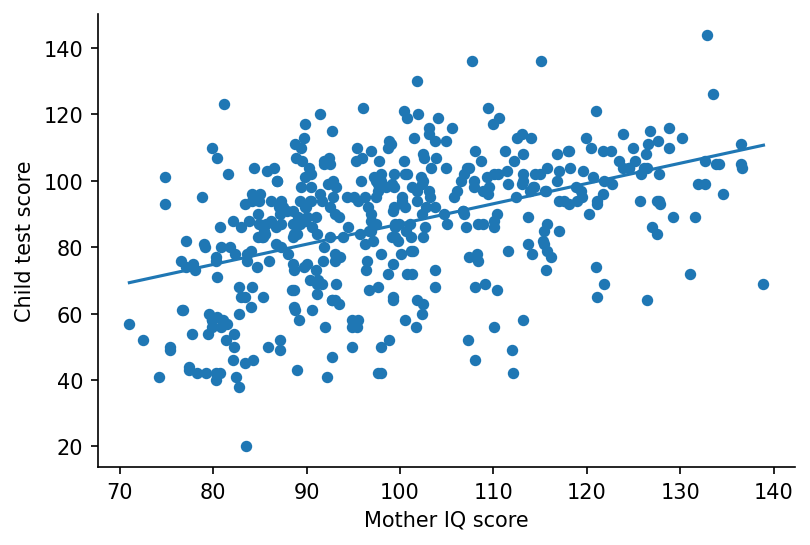

In [31]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mom_iq[0]", "Median"]

# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)

# Plot Line
ax.plot(iq_domain, a_hat + b_hat * iq_domain)

# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");
sns.despine()

## Two predictors
### Linear Regression

In [38]:
model = Model(kidiq)
fit_3 = model.fit('kid_score ~ mom_hs + mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_iq, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_iq, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


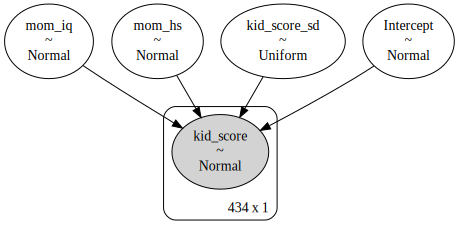

In [39]:
pm_model = model.backend.model
pm.model_to_graphviz(pm_model)

In [77]:
func_dict = {
    "Median": np.median,
    "MAD_SD":stats.median_abs_deviation,
}
coefs = az.summary(fit_3, stat_funcs=func_dict, extend=False, round_to=2)
coefs3 = coefs.copy()

coefs

,Median,MAD_SD
Intercept[0],26.23,3.93
mom_hs[0],6.05,1.51
mom_iq[0],0.56,0.04
kid_score_sd,18.17,0.40


### Graphical displays of data and fitted models

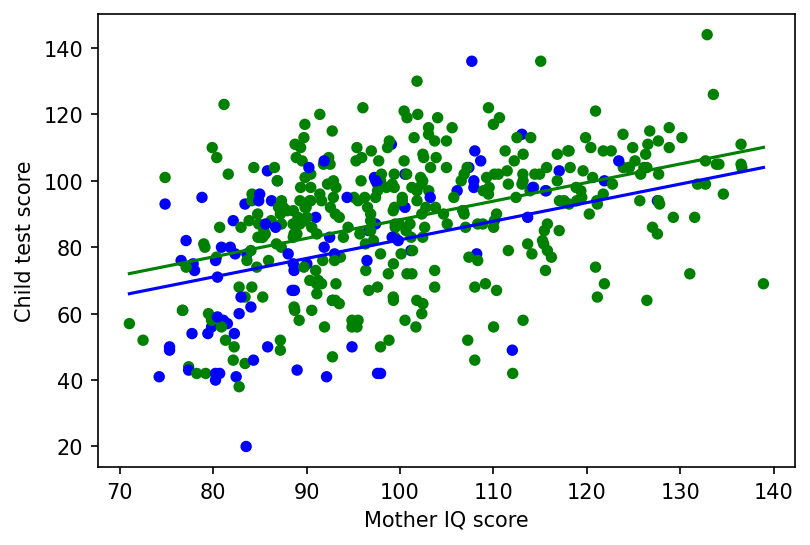

In [44]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)

# # Plot No HS Line
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"]+coefs.loc["mom_iq[0]", "Median"]*iq_domain, c="b")
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"] + coefs.loc["mom_iq[0]", "Median"]*iq_domain + coefs.loc["mom_hs[0]", "Median"], c="g" )


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", c=kidiq["mom_hs"].replace({0: "b", 1:"g"}).values, ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

### Two fitted regression lines – model with interaction

In [46]:
model = Model(kidiq)
M4 = model.fit('kid_score ~ mom_hs + mom_iq + mom_hs*mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, mom_hs:mom_iq, mom_iq, mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, mom_hs:mom_iq, mom_iq, mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9013550363289261, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or cal

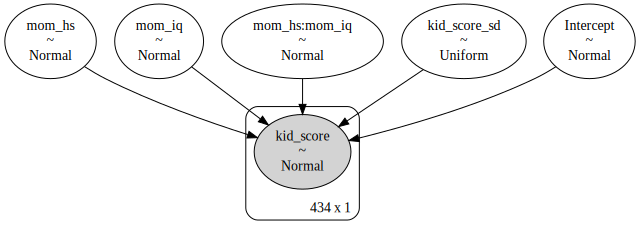

In [56]:
pm_model = model.backend.model
pm.model_to_graphviz(pm_model)

In [78]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M4, stat_funcs=func_dict, extend=False, round_to=2)
coefs4 = coefs.copy()

coefs

,Median,MAD_SD
Intercept[0],-11.16,9.53
mom_hs[0],51.00,10.65
mom_iq[0],0.97,0.10
mom_hs:mom_iq[0],-0.48,0.11
kid_score_sd,18.01,0.41


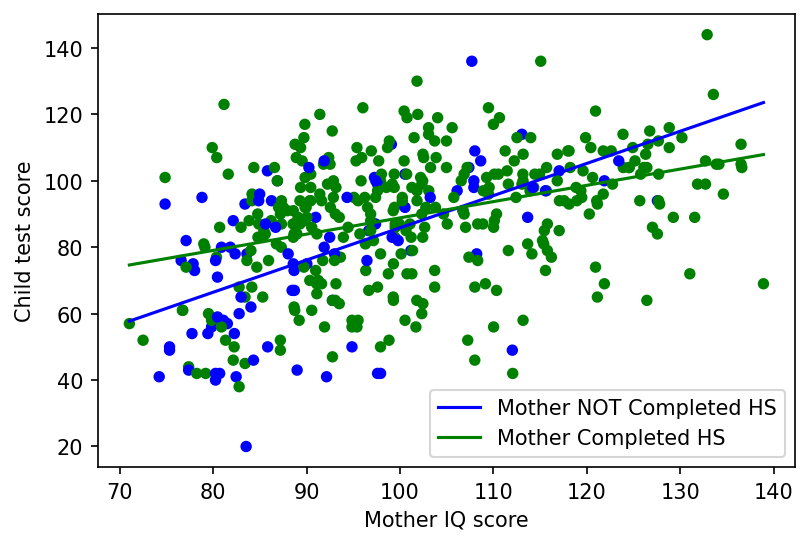

In [63]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()


# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)


# # Plot No HS Line
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"]+coefs.loc["mom_iq[0]", "Median"]*iq_domain, c="b", label="Mother NOT Completed HS")
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"] +
        coefs.loc["mom_iq[0]", "Median"]*iq_domain + 
        coefs.loc["mom_hs[0]", "Median"] +
        coefs.loc["mom_hs:mom_iq[0]", "Median"]*iq_domain,
        c="g", label="Mother Completed HS")


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", c=kidiq["mom_hs"].replace({0: "b", 1:"g"}), ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

ax.legend()

### Displaying uncertainty in the fitted regression
#### A single continuous predictor

In [79]:
coefs2

,Median,MAD_SD
Intercept[0],26.00,3.87
mom_iq[0],0.61,0.04
kid_score_sd,18.30,0.42


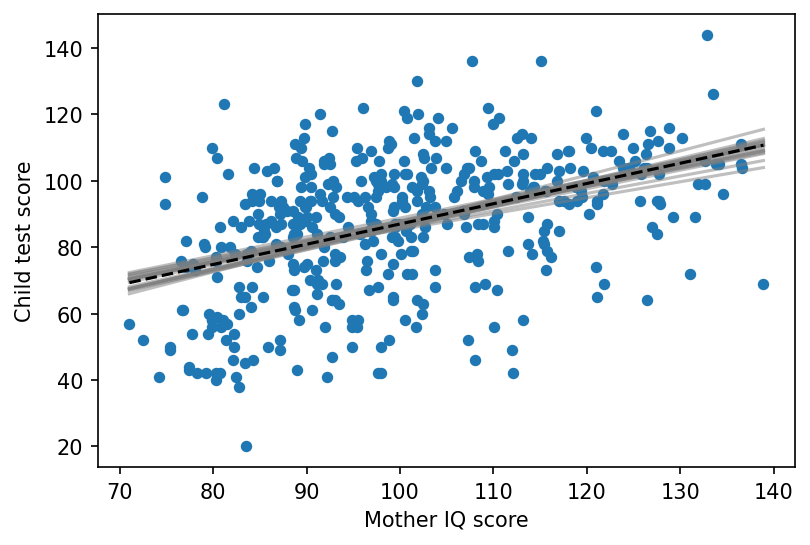

In [84]:
fig, ax = plt.subplots()

# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)

# Take 10 sample from posterior
num_samples = 20
chain_sample = fit_2.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_2.posterior.draw.to_series().sample(num_samples, replace=True)

for chain, draw in zip(chain_sample, draw_sample):
    a_hat = fit_2.posterior.sel({"draw":draw, "chain":chain})["Intercept"].values
    b_hat = fit_2.posterior.sel({"draw":draw, "chain":chain})["mom_iq"].values
    
    # Plot Line
    ax.plot(iq_domain, a_hat+b_hat*iq_domain, c="grey", alpha=.5)

# Add median line later
ax.plot(iq_domain, coefs2.loc["Intercept[0]", "Median"] + coefs2.loc["mom_iq[0]", "Median"]*iq_domain, label="median", color="k", ls="--")
    
# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", ax=ax)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

### Two predictors

In [90]:
display(coefs2)
display(coefs3)
# display(coefs4)

,Median,MAD_SD
Intercept[0],26.00,3.87
mom_iq[0],0.61,0.04
kid_score_sd,18.30,0.42


,Median,MAD_SD
Intercept[0],26.23,3.93
mom_hs[0],6.05,1.51
mom_iq[0],0.56,0.04
kid_score_sd,18.17,0.40


In [110]:
# (coefs3.loc["Intercept[0]", "Median"]) + (coefs3.loc["mom_iq[0]", "Median"]*iq_domain) + (coefs3.loc["mom_hs[0]", "Median"] * completed_hs)


array([39.78094688, 40.1647771 , 40.54860733, 40.93243756, 41.31626779,
       41.70009801, 42.08392824, 42.46775847, 42.8515887 , 43.23541892,
       43.61924915, 44.00307938, 44.38690961, 44.77073983, 45.15457006,
       45.53840029, 45.92223052, 46.30606074, 46.68989097, 47.0737212 ,
       47.45755143, 47.84138165, 48.22521188, 48.60904211, 48.99287234,
       49.37670256, 49.76053279, 50.14436302, 50.52819325, 50.91202347,
       51.2958537 , 51.67968393, 52.06351416, 52.44734438, 52.83117461,
       53.21500484, 53.59883507, 53.98266529, 54.36649552, 54.75032575,
       55.13415598, 55.5179862 , 55.90181643, 56.28564666, 56.66947689,
       57.05330711, 57.43713734, 57.82096757, 58.2047978 , 58.58862802,
       58.97245825, 59.35628848, 59.74011871, 60.12394893, 60.50777916,
       60.89160939, 61.27543962, 61.65926984, 62.04310007, 62.4269303 ,
       62.81076053, 63.19459075, 63.57842098, 63.96225121, 64.34608144,
       64.72991166, 65.11374189, 65.49757212, 65.88140235, 66.26

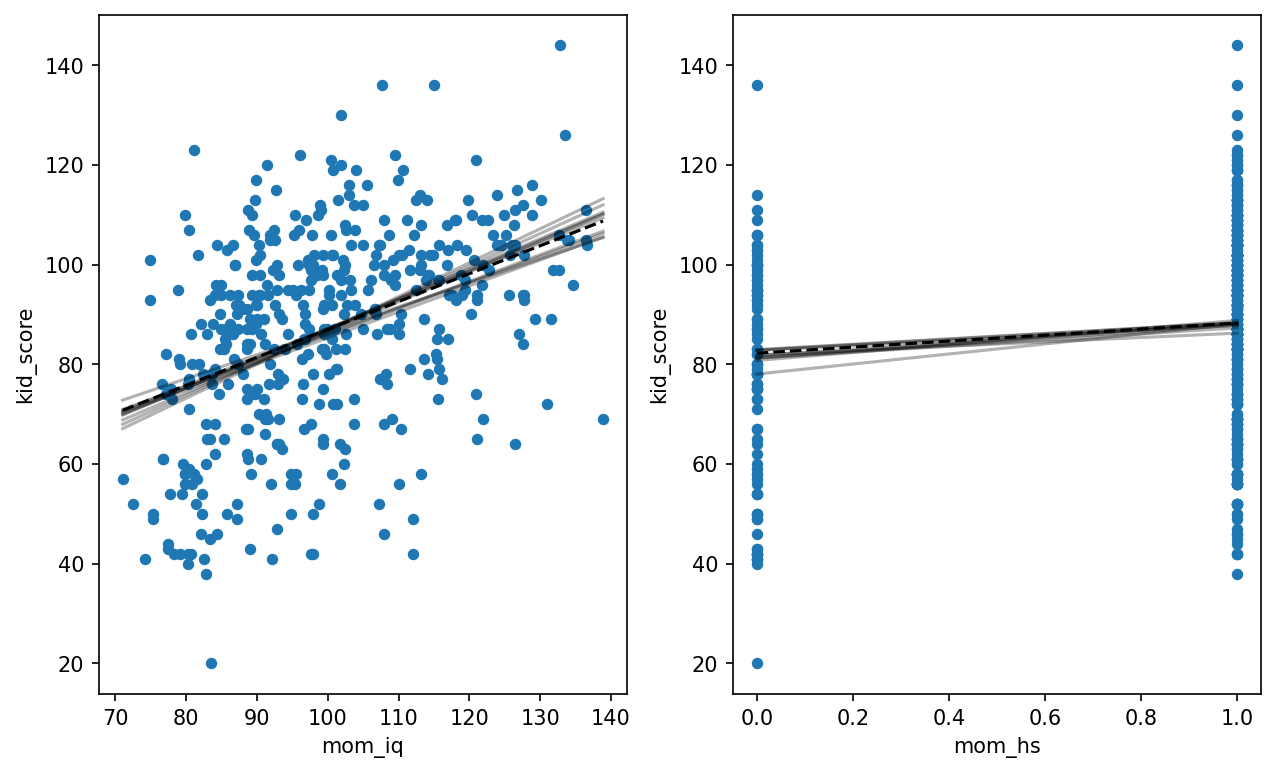

In [113]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))

# Generate x range
iq_domain = np.linspace(kidiq["mom_iq"].min(), kidiq["mom_iq"].max(), 100)
completed_hs = np.array([0,1])

# Take 10 sample from posterior
num_samples = 10
chain_sample = fit_3.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_3.posterior.draw.to_series().sample(num_samples, replace=True)

mom_iq_mean, mom_hs_mean = kidiq[["mom_iq", "mom_hs"]].mean()

for chain, draw in zip(chain_sample, draw_sample):
    intercept = fit_3.posterior[{"draw":draw, "chain":chain}]["Intercept"].values
    mom_iq_coef = fit_3.posterior[{"draw":draw, "chain":chain}]["mom_iq"].values
    mom_hs_coef = fit_3.posterior[{"draw":draw, "chain":chain}]["mom_hs"].values

    #breakpoint()
    # Plot Line
    axes[0].plot(iq_domain, intercept + mom_iq_coef*iq_domain + mom_hs_coef*mom_hs_mean, c="black", alpha=.3)
    axes[1].plot(completed_hs, intercept + mom_iq_coef*mom_iq_mean + mom_hs_coef * completed_hs, c="black", alpha=.3)


# Add median line later
# NOTE: keep the other line at the mean! 
iq_domain_eq = coefs3.loc["Intercept[0]", "Median"] + coefs3.loc["mom_iq[0]", "Median"]*iq_domain + coefs3.loc["mom_hs[0]", "Median"] * mom_hs_mean
axes[0].plot(iq_domain, iq_domain_eq, label="median", color="k", ls="--")

completed_hs_eq = (coefs3.loc["Intercept[0]", "Median"]) + (coefs3.loc["mom_iq[0]", "Median"]*mom_iq_mean) + (coefs3.loc["mom_hs[0]", "Median"] * completed_hs)
axes[1].plot(completed_hs, completed_hs_eq, label="median", color="k", ls="--")


# Add scatter plot
kidiq.plot(kind="scatter", x="mom_iq", y="kid_score", ax=axes[0])
kidiq.plot(kind="scatter", x="mom_hs", y="kid_score", ax=axes[1])

# TODO Add jitter
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

### Center predictors to have zero mean

In [114]:
kidiq["c_mom_hs"] = kidiq["mom_hs"] - kidiq["mom_hs"].mean()
kidiq["c_mom_iq"] = kidiq["mom_iq"] - kidiq["mom_iq"].mean()

In [122]:
kidiq["c_mom_hs"]

0      0.214286
1      0.214286
2      0.214286
3      0.214286
4      0.214286
         ...   
429   -0.785714
430    0.214286
431   -0.785714
432    0.214286
433    0.214286
Name: c_mom_hs, Length: 434, dtype: float64

In [115]:
model = Model(kidiq)
fit_4c = model.fit('kid_score ~ c_mom_hs + c_mom_iq + c_mom_hs:c_mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, c_mom_hs:c_mom_iq, c_mom_iq, c_mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, c_mom_hs:c_mom_iq, c_mom_iq, c_mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [116]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_4c, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],87.60,0.59
c_mom_hs[0],2.89,1.70
c_mom_iq[0],0.59,0.04
c_mom_hs:c_mom_iq[0],-0.48,0.11
kid_score_sd,18.01,0.40


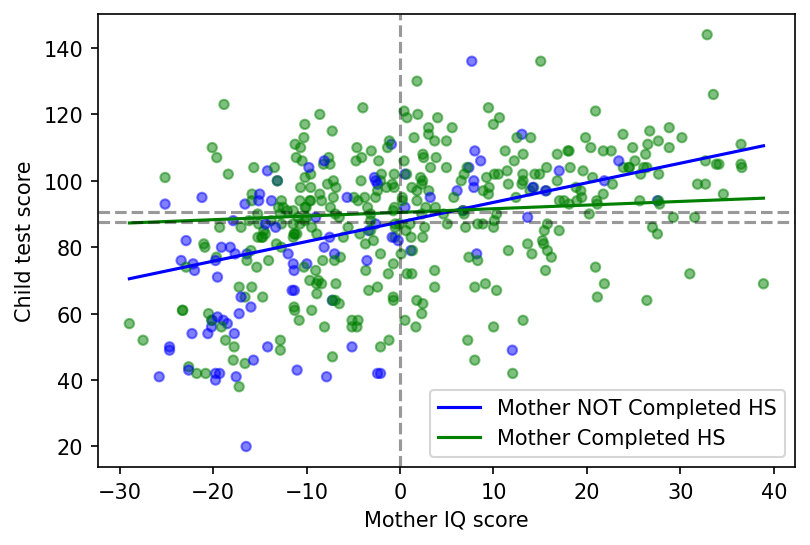

In [140]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()


# Generate x range
iq_domain = np.linspace(kidiq["c_mom_iq"].min(), kidiq["c_mom_iq"].max(), 100)


# # Plot No HS Line
ax.plot(
    iq_domain, 
    coefs.loc["Intercept[0]", "Median"]+coefs.loc["c_mom_iq[0]", "Median"]*iq_domain, 
    c="b", 
    label="Mother NOT Completed HS"
)
ax.plot(iq_domain, coefs.loc["Intercept[0]", "Median"] +
        coefs.loc["c_mom_iq[0]", "Median"]*iq_domain + 
        coefs.loc["c_mom_hs[0]", "Median"] +
        coefs.loc["c_mom_hs:c_mom_iq[0]", "Median"]*iq_domain,
        c="g", label="Mother Completed HS")


# Add scatter plot
kidiq.plot(kind="scatter", x="c_mom_iq", y="kid_score", c=kidiq["mom_hs"].replace({0:"b", 1:"g"}), ax=ax, alpha=0.5)
ax.set_xlabel("Mother IQ score")
ax.set_ylabel("Child test score");

ax.axvline(0, ls="--", color="k", alpha=0.4)
ax.axhline(coefs.loc["Intercept[0]", "Median"], ls="--", color="k", alpha=0.4)
ax.axhline(coefs.loc["Intercept[0]", "Median"] + coefs.loc["c_mom_hs[0]", "Median"], ls="--", color="k", alpha=0.4)
ax.legend()

### Center predictors based on a reference point

In [128]:
kidiq["c2_mom_hs"] = kidiq["mom_hs"] - .5
kidiq["c2_mom_iq"] = kidiq["mom_iq"] - 100

In [129]:
model = Model(kidiq)
fit_4c2 = model.fit('kid_score ~ c2_mom_hs + c2_mom_iq + c2_mom_hs:c2_mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, c2_mom_hs:c2_mom_iq, c2_mom_iq, c2_mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, c2_mom_hs:c2_mom_iq, c2_mom_iq, c2_mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6133308312087897, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [141]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_4c2, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],86.81,0.84
c2_mom_hs[0],2.78,1.67
c2_mom_iq[0],0.72,0.06
c2_mom_hs:c2_mom_iq[0],-0.48,0.11
kid_score_sd,18.01,0.42


### Center and scale predictors to have zero mean and sd=1/2

In [142]:
kidiq["z_mom_hs"] = (kidiq["mom_hs"] - kidiq["mom_hs"].mean())/(2*kidiq["mom_hs"].std())
kidiq["z_mom_iq"] = (kidiq["mom_iq"] - kidiq["mom_iq"].mean())/(2*kidiq["mom_iq"].std())

In [143]:
model = Model(kidiq)
fit_4z = model.fit('kid_score ~ z_mom_hs + z_mom_iq + z_mom_hs:z_mom_iq', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, z_mom_hs:z_mom_iq, z_mom_iq, z_mom_hs, Intercept]
INFO:pymc3:NUTS: [kid_score_sd, z_mom_hs:z_mom_iq, z_mom_iq, z_mom_hs, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [144]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_4z, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],87.63,0.60
z_mom_hs[0],2.30,1.36
z_mom_iq[0],17.57,1.23
z_mom_hs:z_mom_iq[0],-11.82,2.69
kid_score_sd,17.99,0.42


### Predict using working status of mother

In [157]:
y, X = patsy.dmatrices('kid_score ~  C(mom_work)', data={"kid_score": kidiq["kid_score"], "mom_work": kidiq["mom_work"]})
X.design_info.term_names
pd.Categorical(kidiq["mom_work"])

[4, 4, 4, 3, 4, ..., 4, 4, 2, 2, 2]
Length: 434
Categories (4, int64): [1, 2, 3, 4]

In [30]:
model = Model(kidiq)
fit_5 = model.fit('kid_score ~  C(mom_work)', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sd, C(mom_work), Intercept]
INFO:pymc3:NUTS: [kid_score_sd, C(mom_work), Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [31]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_5, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],82.15,1.49
C(mom_work)[0],3.72,1.98
C(mom_work)[1],11.30,2.30
C(mom_work)[2],5.04,1.77
kid_score_sd,19.88,0.29
